# 복습 문제

<1> 다항 회귀의 차수를 높일수록 과적합의 문제가 크게 발생한다.
 - O

<2> 편향-분산 트레이드 오프에서 일반적으로 편향과 분산은 한 쪽이 높아져도 다른 한 쪽은 영향을 받지 않는다.
- X

<3> (__)규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환한다.
- L1

<4> 분류와 회귀의 큰 차이는 분류의 예측값은 (__)이고 회귀의 예측값은 (__) 라는 것이다.
- 카테고리, 연속된 숫자

<5> 회귀에서 학습이 얼마나 잘 되었는가를 평가하는 지표는 무엇인가요
- MAE(Mean Absolute Error) : 시그마(|실제 y - 예측 y|) / N
- MSE(Mean Squared Error) : 시그마(실제 y - 예측 y)^2 / N
- RMSE(Rooted Mean Squared Error) : MSE^(1/2)

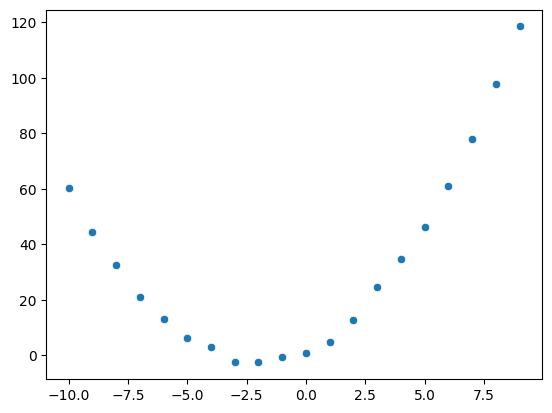

In [21]:
# <6> 
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

# y = 1 + 4x + x**2

X = np.arange(-10,10)
y = 1 + 4*X + X**2 + np.random.randn(20)

sns.scatterplot(x = X,y = y); 

In [24]:
## 2차 다항식으로 변환 후 선형회귀 적용하기
X_poly = PolynomialFeatures(degree = 2).fit_transform(X.reshape(-1, 1))

lr = LinearRegression()
lr.fit(X_poly, y)

print(lr.coef_, lr.intercept_)

[0.         4.06166239 0.98898701] 1.594330611279684


<7> 회귀 예측의 핵심은 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 (____)을 찾아내는 것이다.
- 회귀 계수

<8> 규제를 적용한 모델 3가지(릿지, 라쏘, 엘라스틱넷)
- L1 : Lasso 
- L2 : Ridge
- L1 + L2 : Elasticnet

<9>
- MSE에 루트를 씌운 것 (RMSE)
- 실제값과 예측값의 차이를 절대값을 변환해 평균한 것   (MAE)
- 실제값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높다  ( R^2 )
- 실제값과 예측값의 차이를 제곱 해 평균한 것   (MSE)

<10>
- Cost Function : 비용함수
- Loss Function : 손실함수
- Objective Function : 목적함수
- Error Function : 오차함수

<11> 322p

LinearRegression클래스는 예측값과 실제값의 RSS(잔차 제곱의 합)을 최소화하여

Ordinary Least Squares(일명, OLS)추정 방식으로 구현한 클래스이다.

OLS 기반의 회귀 계수 계산은 피처의 독립성에 많은 영향을 받는데,

피처간의 (____)가 매우 높은 경우 오류에 매우 민감해진다.

이러한 현상을 다중 공선성(multi-collinearity)이라 하며,

이와같은 경우 (_______)한 피처만 남기고 제거하거나 (___)를 적용한다 

- 상관정도
- 중요한
- PCA

<11-1>

2개 이상의 변수...ab가 만나서 시너지가 생기는 것 : 교호작용(다중회귀분석에서 나옴)

a, b, c (실제 변수는 3개이지만)

ab, ac, bc, 

abc (총 7개의 변수가 있는 것처럼 바뀜 - 이를 주의해야 함)

<12> 회귀모델에서 'MAE', 'MSE', 'RMSE'의 평가 지표는 수치가 (___)수록 잘 예측했다고 표현
- 낮을수록

<13> (___) 회귀는 회귀라는 이름이 붙어있지만, 사실은 분류에 사용되는 선형 모델이다
- LogisticRegression

<14> 편향-분산 트레이드 오프란?
- 편향 : 모델이 단순하다
- 분산 : 모델이 복잡하다(차수가 높음)

<15> 오류를 최소화 하려면 편향이 높고 분산이 낮으면 된다.
- X

<16> 선형회귀에 L2 규제를 추가해 상대적으로 큰 회귀 계수 값의 예측 영향도가 감소된 모델은?
- 릿지(Ridge)
- RSS : residual sum of square(잔차제곱합)

<17> 비용 함수에 alpha 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 (___)라고 한다.
- 규제

# 수업

### 선형 회귀 모델을 위한 데이터 변환

- 선형 회귀 모델과 같은 선형 모델은 일반적으로 피처와 타깃값 간에 선형 관계가 있다고 가정하고, 이러한 최적의 선형함수를 찾아내 결괏값을 예측
- 선형 회귀 모델은 피처값과 타깃값의 분포가 정규 분포 형태를 선호함
- 특정값의 분포가 치우친 왜곡된(skew) 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높음

따라서 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적임

일반적으로 피처 데이터 세트와 타깃 데이터 세트에 이러한 스케일링/정규화 작업을 수행하는 방법이 조금은 다름

<피처 데이터 세트에 적용하는 변환 작업>
- StandardScaler OR MinMaxScaler
- 스케일링/정규화를 수행한 데이터 세트에 다히 다항 특성을 적용하여 반환
- 원래 값에 log 함수를 적용하면 정규 분포에 가까운 형태로 값이 분포됨(많이 이용되는 방법)

In [205]:
# method는 표준 정규 분포 변환(Standard), 최대값/최솟값 정규화(MinMax), 로그변환(log) 결정
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2 이상 부여하지 않음
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def get_scaled_data(method = 'None', p_degree = None, input_data = None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree = p_degree, include_bias = False).fit_transform(scaled_data)
        
    return scaled_data

In [214]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True, return_coeff = True):
    coeff_df = pd.DataFrame()
    
    if verbose : print('###### ', model_name, '######')
    
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha = param)
        elif model_name == 'Lasso' : model = Lass(alpha = param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha = param, l1_ratio = 0.7)
        
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        
        print(f'alpha {param}일 때 5 폴드 세트의 평균 RMSE : {avg_rmse}')
        # corss_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
            coeff = pd.Series(data = model.coef_, index = X_data_n.columns)
            colname = 'alpha:' + str(param)
            coeff_df[colname] = coeff
            
        return coeff_df
    

In [210]:
from sklearn.datasets import load_boston

boston = load_boston()

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['PRICE'] = boston.target

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis = 1, inplace = False)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [215]:
#### Ridge 클래스의 alpha 값을 변화시키면서 피치 데이터 세트를 여러 가지 방법으로 변환한 데이터 세트를 입력받을 경우 RMSE 값이 어떻게 변하는지 살펴보기

# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준정규 분포 + 다항식 특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], input_data = X_data)
    
    print(f'\n## 변환 유형 : {scale_method[0]}, Polynomial Degree : {scale_method[1]}')
    get_linear_reg_eval('Ridge', params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = False, return_coeff = False)


## 변환 유형 : None, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.788486627032413

## 변환 유형 : Standard, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.825992799389451

## 변환 유형 : Standard, Polynomial Degree : 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 8.827235873002849

## 변환 유형 : MinMax, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.76357022528831

## 변환 유형 : MinMax, Polynomial Degree : 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.29756000312692

## 변환 유형 : Log, Polynomial Degree : None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 4.770429614681662


- 일반적으로 선형 회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우에 이처럼 로그 변환을 적용하는 것이 좋은 결과를 기대할 수 있음

## LogisticRegression(로지스틱 회귀분석)

로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘임 (선형 회귀 계열)
- 선형 함수가 아닌 시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환값을 확률로 간주해 확률에 따라 분류를 결정함
- S자 커브를 가짐
- 시그모이드 함수의 정의는 y = 1/1 + e^(-1)
- 시그모이드 함수는 X 값이 아무리 커지거나 작아져도 y값은 항상 0과 1 사이의 값을 반환함
- x값이 커지면 1에 근사하며 x값이 작아지면 0에 근사함
- x값이 0일 때에는 0.5임
- 로지스틱 회귀는 이처럼 선형 회귀 방식을 기반으로 하되 시그모이드 함수를 이용해 분류를 수행하는 회귀임

사이킷런은 로지스틱 회귀를 위해서 LogisticRegression 클래스를 제공함

<solver 파라미터>
- lbfgs
- liblinear
- newton-cg
- sag
- saga

일반적으로 lbfgs 또는 liblinear를 선택하는 것이 대부분임

In [220]:
# LogisticRegression 클래스 사용을 통한 암 여부 판단
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [221]:
## 표준 스케일링 후 데이터 세트 분리
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size= .3, random_state = 0)

In [223]:
## 로지스틱 회귀를 이용해 학습 및 예측을 수행하고, 정확도와 ROC-AUC 값을 구하기
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행
# solver 인자값을 생성자로 입력하지 않으면 solver = 'lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

lr_preds = lr_clf.predict(X_test)

# accuracy와 roc-auc 측정
print(accuracy_score(y_test, lr_preds))
print(roc_auc_score(y_test, lr_preds))

0.9766081871345029
0.9715608465608465


- 사이킷런 LogisticRegression 클래스의 주요 하이퍼 파라미터로 penalty와 C가 있습니다. 
- penalty는 규제(Regularization)의 유형을 설정하여 'l2'로 설정 시 L2 규제를, 'l1'으로 설정 시 L1 규제를 뜻함.
- C는 규제 강도를 조절하는 alpha 값의 역수임(C 값이 작을수록 규제 강도가 큼)

In [224]:
from sklearn.model_selection import GridSearchCV

params = {'solver' : ['liblinear', 'lbfgs'],
         'penalty' : ['l1', 'l2'],
         'C' : [0.01, 0.1, 1, 1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3)
grid_clf.fit(data_scaled, cancer.target)

print(grid_clf.best_params_)
print(grid_clf.best_score_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.9789102385593614


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [0.92261209        nan 0.96485659 0.94555834 0.96131997        nan
 0.97891024 0.97364708 0.96660169        nan 0.97539218 0.97539218
 0.9648473         nan 0.97539218 0.97539218 0.96660169        nan
 0.97539218 0.97539218 0.96662025        nan 0.97011974 0.97011974
 0.96134781        nan 0.96661097 0.96661097]
  warnings.warn(


- 로지스틱 회귀는 가볍고 빠르지만, 이진 분류 예측 성능도 뛰어남
- 이 때문에 로지스틱 회귀를 이진 분류의 기본 모델로 사용하는 경우가 많음
- 또한 로지스틱 회귀는 희소한 데이터 세트 분류에도 뛰어난 성능을 보여서 텍스트 분류에서도 자주 사용됨

### 회귀 트리 355p 참조
- 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM 등의 앞에서 소개한 모든 트리 기반의 알고리즘은 분류 뿐만 아니라 회귀도 가능함
- 사이킷런에서는 결정 트리, 랜덤 포레스트, GBM에서 CART 기반의 회귀 수해을 할 수 있는 Estimator 제공

트리 기반 회귀와 분류의 Estimator 클래스

알고리즘 - 회귀 Estimator 클래스 - 분류 Estimator 클래스 순
- Decision Tree - DecisionTreeRegressor - DecisionTreeClassifier
- Gradient Boosting - GradientBoostingRegressor - GradientBoostingClassifier
- XGBoost - XGBRegressor - XGBClassifier
- LightGBM - LGBMRegressor - LGBMClassifier

In [227]:
rf = RandomForestRegressor(random_state = 0, n_estimators = 100)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(neg_mse_scores)
print(rmse_scores)
print(avg_rmse)

[ -8.04382131 -13.57626003 -18.16442825 -47.62156459 -20.45226132]
[2.83616313 3.68459768 4.26197469 6.90083796 4.52241764]
4.441198220092327


In [228]:
## 입력 모델과 데이터 세트를 입력받아 교차 검증으로 평균 RMSE를 계산해주는 함수
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('######', model.__class__.__name__, '######')
    print(f'5 교차 검증의 평균 RMSE : {avg_rmse}')

In [229]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

###### DecisionTreeRegressor ######
5 교차 검증의 평균 RMSE : 5.977957424580515
###### RandomForestRegressor ######
5 교차 검증의 평균 RMSE : 4.422538982804892
###### GradientBoostingRegressor ######
5 교차 검증의 평균 RMSE : 4.26899822168126
###### XGBRegressor ######
5 교차 검증의 평균 RMSE : 4.251080362834295
###### LGBMRegressor ######
5 교차 검증의 평균 RMSE : 4.646441191925675


<AxesSubplot:>

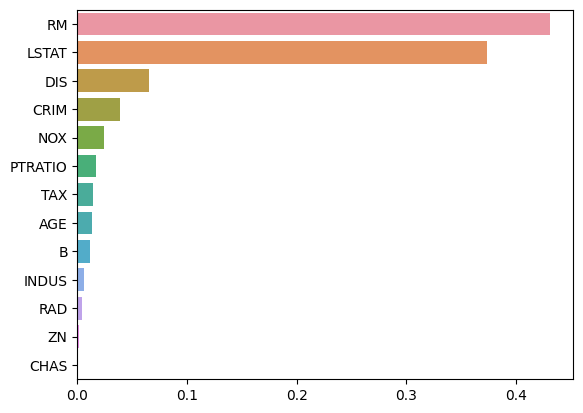

In [230]:
### 보스턴 주택 가격 모델의 피처별 중요도 시각화
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

### 회귀 실습 - 자전거 대여 수요 예측

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

In [236]:
bike_df = pd.read_csv('./data/bike_train.csv')
bike_df.shape

(10886, 12)

In [41]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [44]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [237]:
###### datetime columns을 datetime의 datetime으로 바꾸기
from datetime import datetime

bike_df['datetime'] = bike_df['datetime'].astype('datetime64[ns]')

# 다른 방법들
# bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [238]:
bike_df['datetime'].map(lambda x: x.strftime('%Y'))

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: object

In [239]:
bike_df['datetime']
bike_df['year'] = bike_df['datetime'].map(lambda x: x.strftime('%Y'))
bike_df['month'] = bike_df['datetime'].map(lambda x: x.strftime('%m'))
bike_df['day'] = bike_df['datetime'].map(lambda x: x.strftime('%d'))
bike_df['hour'] = bike_df['datetime'].map(lambda x: x.strftime('%H'))

# 다른 방법
# bike_df['datetime'].dt.strftime('%Y')
# bike_df['datetime'].dt.strftime('%m')
# bike_df['datetime'].dt.strftime('%d') 

# 다른 방법(1)
# bike_df['year'] = bike_df.datetime.dt.year
# bike_df['month'] = bike_df.datetime.dt.month
# bike_df['day'] = bike_df.datetime.dt.day
# bike_df['hour'] = bike_df.datetime.dt.hour 

# 책에서 나온 방법
# bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
# bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
# bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
# bike_df['day'] = bike_df.datetime.apply(lambda x: x.hour)

In [240]:
bike_df[:3]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02


In [241]:
bike_df.drop(['datetime', 'casual', 'registered'], axis = 1, inplace = True)
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,01,01,00
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,01,01,01
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,01,01,02
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,01,01,03
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,01,01,04


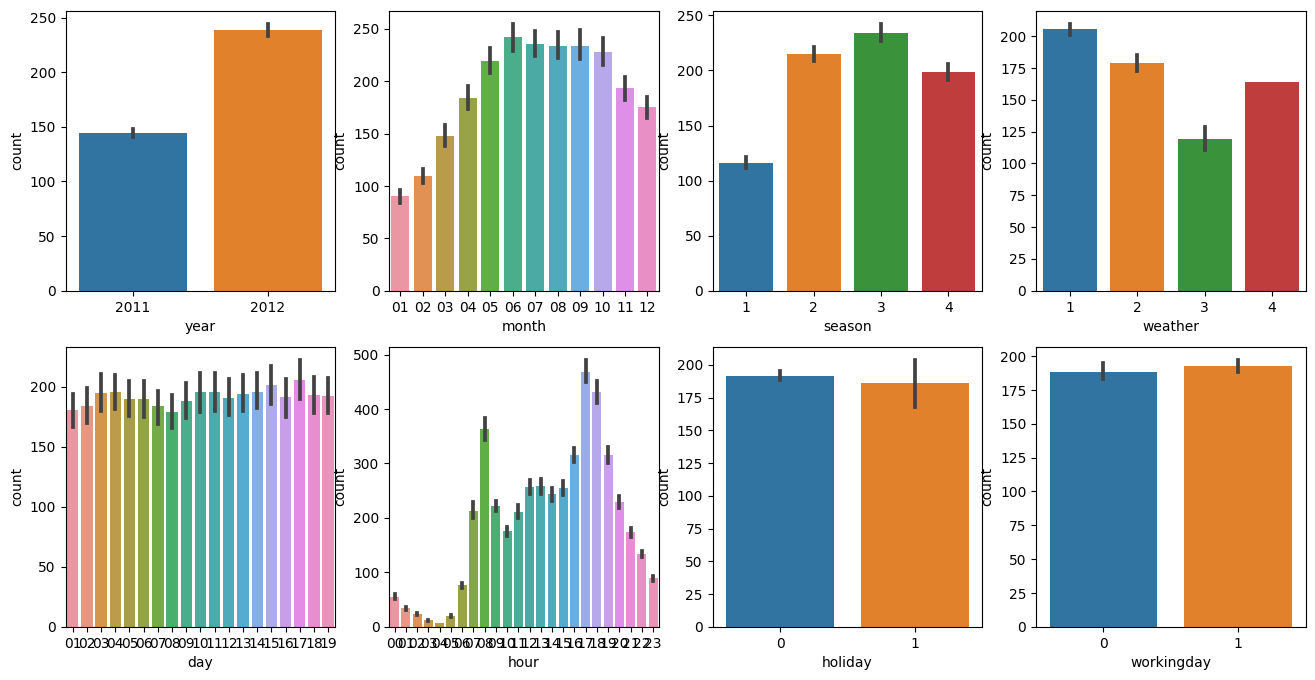

In [242]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']

# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 평균값을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col]) 

In [243]:
###### 데이터 나누기
y_target = bike_df['count']
X_features = bike_df.drop('count', axis = 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0)

In [90]:
###### LinearRegression으로 MSE 구하기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)

MSE = mse(y_test, pred)
MSE

19852.694087841555

In [91]:
y_test.describe()

count    3266.000000
mean      194.430496
std       180.235458
min         1.000000
25%        43.000000
50%       153.000000
75%       285.750000
max       901.000000
Name: count, dtype: float64

In [92]:
###### 위의 describe를 보니 오른쪽 꼬리가 긴 형태임을 알 수 있음 log 변환해주기
np.log1p(y_test)

6638     5.501258
7975     5.480639
5915     5.438079
8050     6.148468
5894     5.817111
           ...   
5521     1.791759
10626    2.564949
8126     4.317488
1633     4.143135
6198     5.153292
Name: count, Length: 3266, dtype: float64

In [98]:
###### y_test와 preds 를 로그 변환해서 MSE에 넣어주기
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

mse(y_test, pred)

1.0339363308076928

In [99]:
pred

array([5.7353795 , 5.08865258, 4.99393205, ..., 5.86621689, 5.03923437,
       4.31986653])

In [101]:
###### 위의 pred는 log의 형태로 예측한 값이므로 예측한 값을 보기 위해서는 다시 변환해야 함
# np.expm1함수가 값을 돌려줌
np.expm1(pred)

array([308.63045453, 161.17120235, 146.5153226 , ..., 351.91134842,
       153.35179351,  74.17859374])

In [249]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print(f'RMSLE : {rmsle_val}, RMSE : {rmse_val}, MAE : {mae_val}')
    
def evaluate_regr(y, pred) : 
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y, pred)
    print(f'RMSLE : {rmsle_val}, RMSE : {rmse_val}, MAE : {mae_val}')

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 : 
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('####', model.__class__.__name__, '####')
    evaluate_regr(y_test, pred)

In [245]:
X_features_ohe = pd.get_dummies(X_features, columns = ['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size = 0.3, random_state = 0)

- 항상 그런 것은 아니지만 원-핫 인코딩을 통해 피처들의 영향도가 달라지고, 모델의 성능도가 향상될 수 있음

In [250]:
###### 회귀 트리를 이용해 회귀 예측 수행하기
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators = 500)
xgb_reg = XGBRegressor(n_estimators = 500)
lgbm_reg = LGBMRegressor(n_estimators = 500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력될 겨우 버전에 따라 오류 발생 가능. ndarray로 변환
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1 = True)

#### RandomForestRegressor ####
RMSLE : 0.35563047216704174, RMSE : 50.44714808595174, MAE : 31.202745954289835
#### GradientBoostingRegressor ####
RMSLE : 0.3298582318181708, RMSE : 53.34954412935971, MAE : 32.74941820920819
#### XGBRegressor ####
RMSLE : 0.3422048283339225, RMSE : 51.73158151916774, MAE : 31.251221714159207
#### LGBMRegressor ####
RMSLE : 0.3188456499157369, RMSE : 47.21464677592674, MAE : 29.028770412428237


## 회귀 연습 - 캐글 주택 가격 : 고급 회귀 기법

In [264]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org = pd.read_csv('./data/house_train.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [255]:
house_df.shape

(1460, 81)

In [258]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

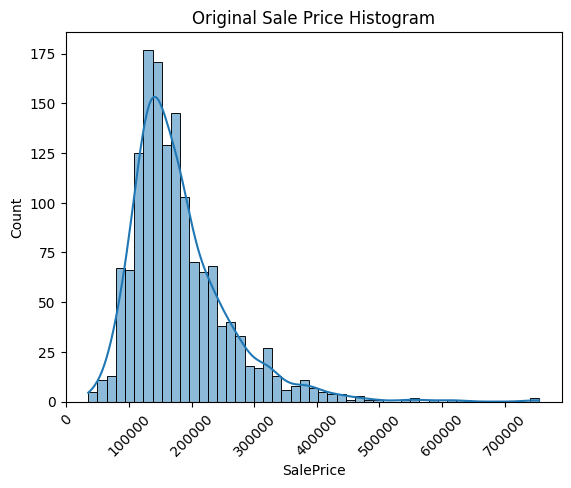

In [259]:
## 1. Target 값인 SalePrice가 정규 분포인지 확인하기
plt.title('Original Sale Price Histogram')
plt.xticks(rotation = 45)
sns.histplot(house_df['SalePrice'], kde = True)
plt.show()

- 중심에서 왼쪽으로 치우친 형태로 정규 분포에서 벗어나있음
- 정규 분포로 변환하기 위해 로그 변환을 적용하겠음

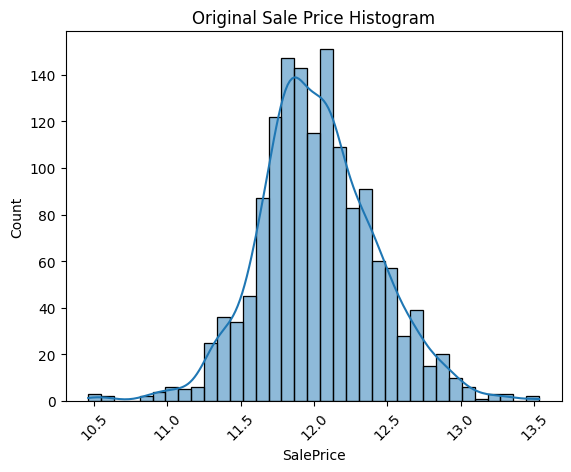

In [260]:
### 정규 분포 변환위한 로그 변환
plt.title('Original Sale Price Histogram')
plt.xticks(rotation = 45)
sns.histplot(np.log1p(house_df['SalePrice']), kde = True)
plt.show()

In [265]:
# SalePrice 로그 변환
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1, inplace = True)

# 드롭하지 않는 숫자형 Null 칼럼은 평균값으로 대체
house_df.fillna(house_df.mean(), inplace = True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type: \n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type: 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [267]:
### one-hot-encoding
print('get_dummies 수행 전 데이터 shape', house_df.shape)

house_df_ohe = pd.get_dummies(house_df)

print('get_dummies 수행 후 데이터 shape', house_df_ohe.shape)

get_dummies 수행 전 데이터 shape (1460, 75)
get_dummies 수행 후 데이터 shape (1460, 271)


### 선형 회귀 모델 학습/예측/평가

In [268]:
### RMSE 측정할 것이므로 이를 계산하는 함수 만들기
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE : ', np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [269]:
## 선형 회귀 모델을 학습하고 예측하기
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop(['SalePrice'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

## LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE :  0.132
Ridge 로그 변환된 RMSE :  0.128
Lasso 로그 변환된 RMSE :  0.176


[0.13189576579154041, 0.12750846334053037, 0.17628250556471403]

- Lasso 회귀의 경우 회귀 성능이 타 회귀 방식보다 많이 떨어지는 결과가 나옴
- 라쏘의 경우 회적 하이퍼 파라미터 튜닝이 필요해보임

In [270]:
### 피처별 회귀 계수를 시각화해서 모델별로 어떠한 피처의 회귀 계수로 구성되는지 확인해보기
def get_top_bottom_coef(model, n = 10):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 칼럼명
    coef = pd.Series(model.coef_, index = X_features.columns)
    
    # + 상위 10개, - 하위 10개의 회귀 계수를 추출해 반환
    coef_high = coef.sort_values(ascending = False).head(n)
    coef_low = coef.sort_values(ascending = False).tail(n)
    return coef_high, coef_low

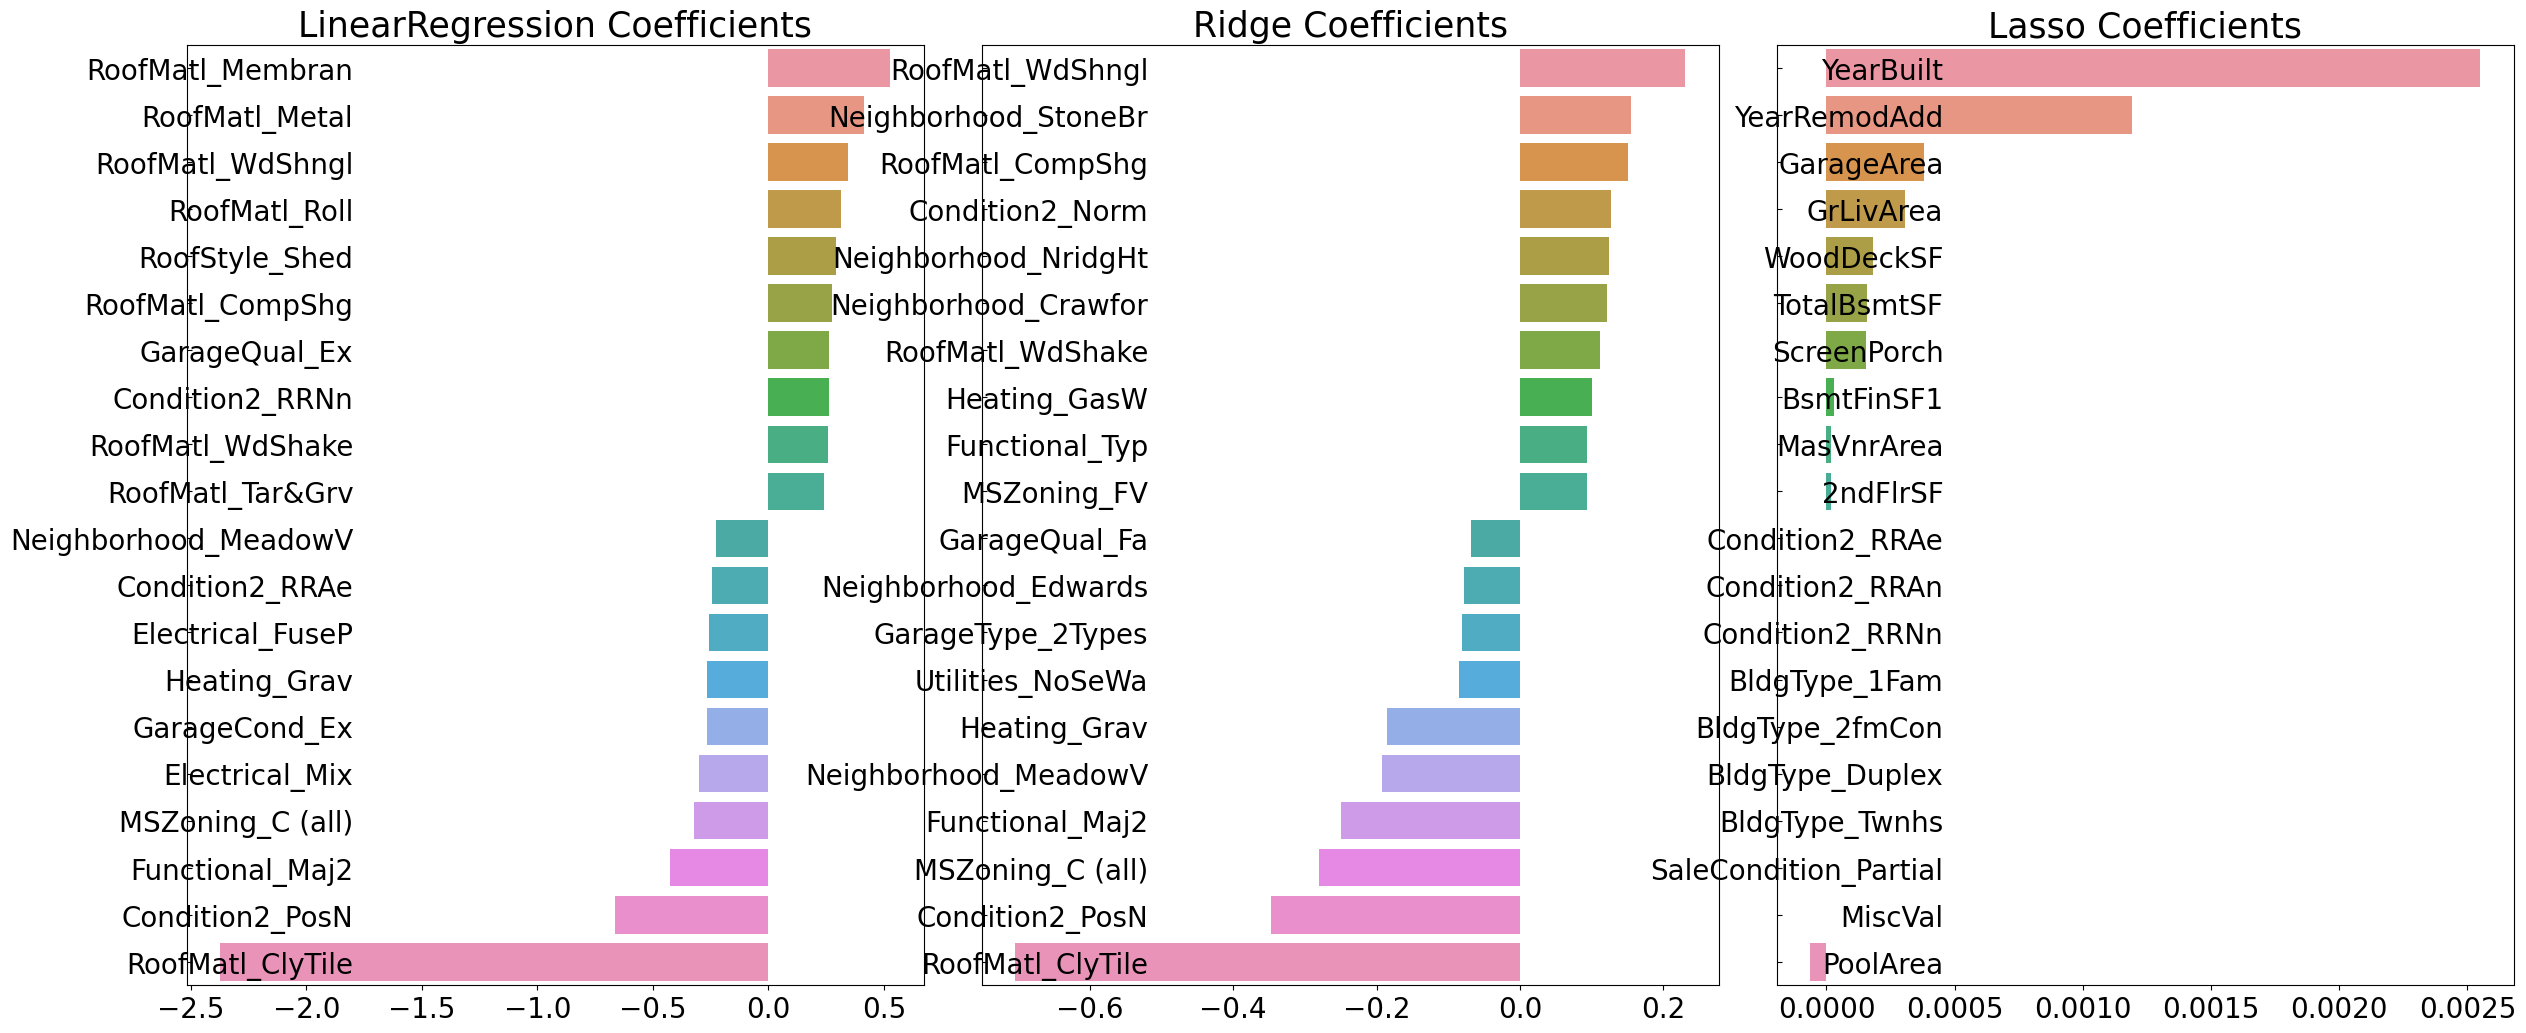

In [274]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize = (24, 10), nrows = 1, ncols = 3)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        axs[i_num].set_title(model.__class__.__name__+' Coefficients', size = 25)
        axs[i_num].tick_params(axis = 'y', direction = 'in', pad = -120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(20)
        sns.barplot(x=coef_concat.values, y = coef_concat.index, ax = axs[i_num])
        
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

- 라쏘는 전체적으로 회귀 계수가 매우 작음
- 학습 데이터 분할에 문제가 있어서 그럴 수 있음

In [276]:
## 모델과 하이퍼 파라미터 딕셔너리 객체를 받아 최적화 작업의 결과를 표시
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params, scoring = 'neg_mean_squared_error', cv = 5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print(f'{model.__class__.__name__} 5 CV 시 최적 평균 RMSE 값 : {np.round(rmse, 4)}, 최적 alpha : {grid_model.best_params_}')
    
ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.1418, 최적 alpha : {'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.142, 최적 alpha : {'alpha': 0.001}


LinearRegression 로그 변환된 RMSE :  0.132
Ridge 로그 변환된 RMSE :  0.124
Lasso 로그 변환된 RMSE :  0.12


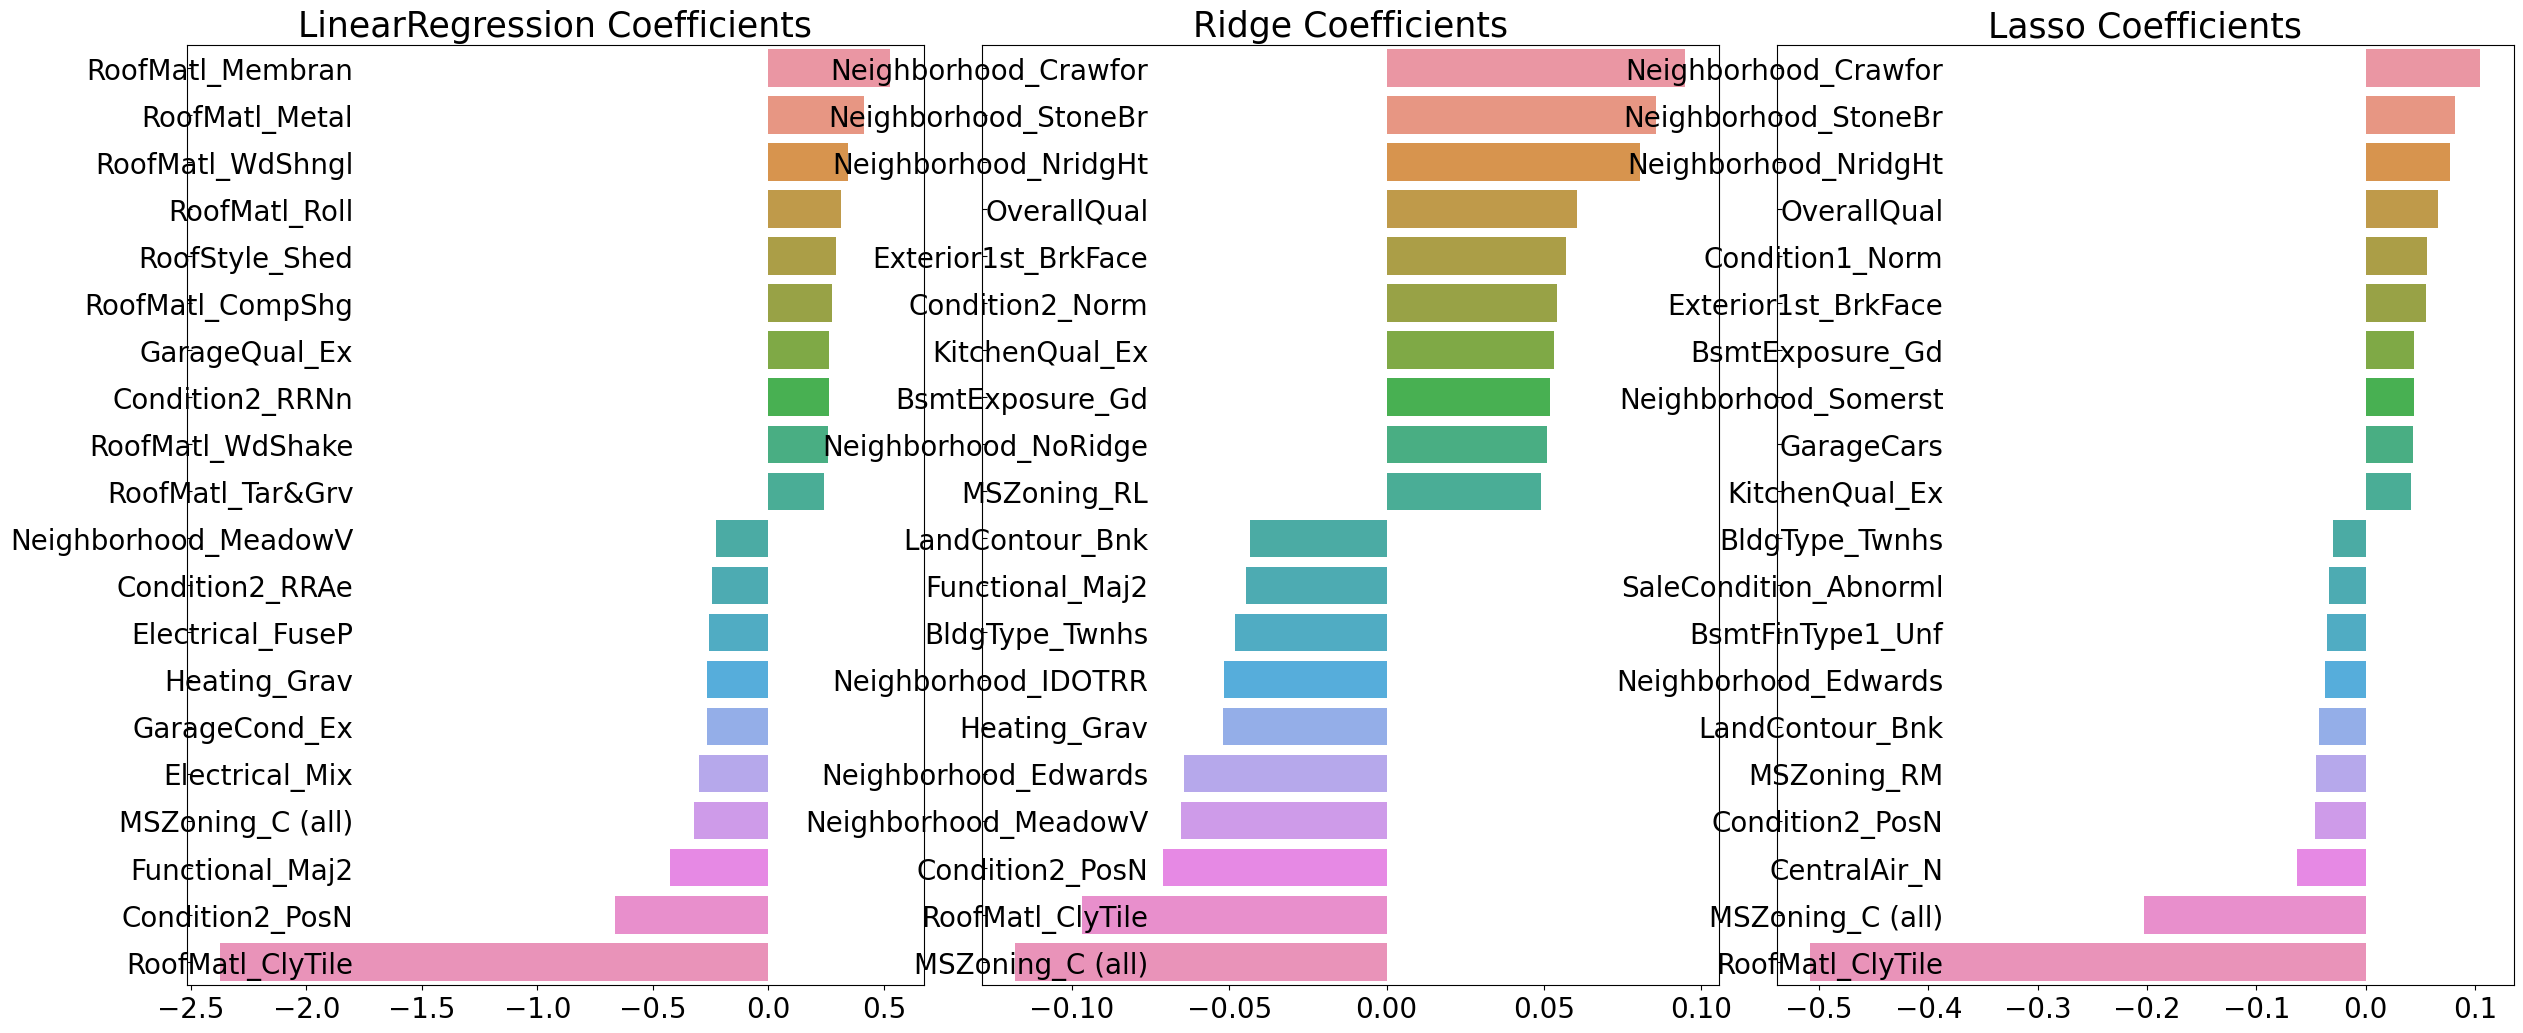

In [277]:
## 앞의 최적화 alpha 값으로 학습 데이터를 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 12)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

## 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

## 모든 모델의 회귀 계수 시각화
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

모델 튜닝
- 피처 데이터 세트의 데이터 분포도
- 이상치 데이터 처리

피처 데이터 세트의 경우도 지나치게 왜곡된 피처가 존재할 경우 회귀 예측 성능을 저하시킬 수 있음

모든 숫자형 피처의 데이터 분포도를 확인해 분포도가 어느 정도로 왜곡됐는지 확인해보기

In [278]:
from scipy.stats import skew

# object가 아닌 숫자형 피처 칼럼의 index 객체 추출
features_index = house_df.dtypes[house_df.dtypes != 'object'].index

# house_df에 칼럼 index를 []로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew() 호출
skew_features = house_df[features_index].apply(lambda x: skew(x))

# skew(왜곡) 정도가 1 이상인 칼럼만 추출
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [279]:
## 추출 왜곡 정도가 높은 피처를 로그 변환하기
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [280]:
## 왜곡 정도가 높은 피처를 로그 변환했으므로 다시 원-핫 인코딩을 적용하고 피처/타깃 데이터 세트 생성
house_df_ohe = pd.get_dummies(house_df)

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

## 피처를 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.1275, 최적 alpha : {'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.1252, 최적 alpha : {'alpha': 0.001}


이상치 데이터 분석하기
- 회귀 계수가 높은 피처, 즉 예측에 많은 영향을 미치는 중요 피처의 이상치 데이터 처리가 중요함
- 먼저 세 개 모델 모두에서 가장 큰 회귀 계수를 가지는 GrLivArea 피처의 데이터 분포를 살펴보겠음

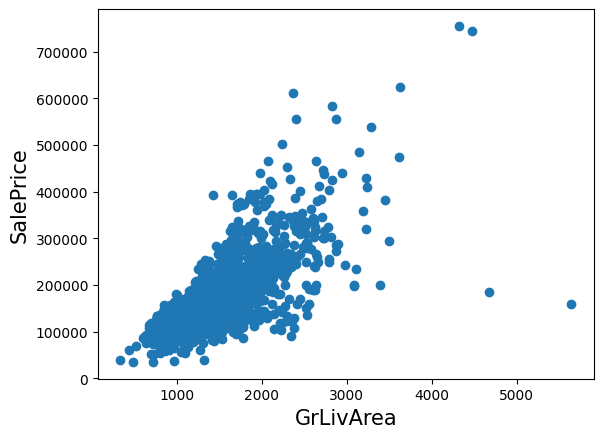

In [281]:
## 주택 가격 데이터가 변환되기 이전의 원본 데이터 세트인 house_df_org에서 GrLivArea와 타깃 값인 SalePrice의 관계 시각화 하기
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize = 15)
plt.xlabel('GrLivArea', fontsize = 15)
plt.show()

In [282]:
## GrLivArea가 4000평방피트 이상임에도 가격이 500,000 달러 이하인 데이터는 모두 이상치로 간주하고 삭제하기

# GrLivArea와 SalePrice 모두 로그 변환됐으므로 이를 반영한 조건 생성
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

# DataFrame의 인덱스를 이용해 이상치 레코드 삭제
house_df_ohe.drop(outlier_index, axis = 0, inplace = True)
house_df_ohe.shape

(1458, 271)

In [283]:
### 업데이트 된 house_df_ohe를 기반으로 피처 데이터 세트와 타깃 데이터 세트를 다시 생성하고
### 앞서 정의한 print_best_params() 함수를 이용해 릿지와 라쏘 모델의 최적화를 수행하고 결과 출력하기
y_target = house_df_ohe['SalePrice']
X_features=  house_df_ohe.drop('SalePrice', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

ridge_params = {'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값 : 0.1125, 최적 alpha : {'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값 : 0.1122, 최적 alpha : {'alpha': 0.001}


- 이상치 제거 후, 예측 성능 크게 향상됨

### 회귀 트리 모델 학습/예측/평가

In [285]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators' : [1000]}
xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample = 0.8)
print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값 : 0.1178, 최적 alpha : {'n_estimators': 1000}


In [286]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators' : [1000]}
lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate = 0.05, num_leaves = 4, subsample = 0.6, colsample_bytree = 0.4, reg_lambda = 10, njobs = -1)
print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Warning] Unknown parameter: njobs
[LightGBM] [Warning] Unknown parameter: njobs
[LightGBM] [Warning] Unknown parameter: njobs
[LightGBM] [Warning] Unknown parameter: njobs
[LightGBM] [Warning] Unknown parameter: njobs
[LightGBM] [Warning] Unknown parameter: njobs
LGBMRegressor 5 CV 시 최적 평균 RMSE 값 : 0.1163, 최적 alpha : {'n_estimators': 1000}


### 회귀 모델의 예측 결과 혼합을 통한 최종 예측

In [289]:
## 최종 혼합 모델, 개별 모델의 RMSE 값을 출력하느 get_rmse_pred() 함수를 생성하고 각 모델의 예측값을 계산한 뒤 개별 모델과 최종 혼합 모델의 RMSE 구하기
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print(f'{key} 모델의 RMSE : {rmse}')
        
# 개별 모델의 학습
ridge_reg = Ridge(alpha = 8)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합' : pred,
        'Ridge' : ridge_pred,
        'Lasso' : lasso_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.10007930884470498
Ridge 모델의 RMSE : 0.10345177546603235
Lasso 모델의 RMSE : 0.10024170460890024


- 최종 혼합 모델의 성능이 좀 더 좋음
- 0.4, 0.6의 가중치는 정해진 기준 없음(위 예제에서는 성능이 조금 더 좋은 쪽에 가중치를 약간 더 줌)

In [290]:
### 이번에는 XGBoost와 LightBGM 혼합
xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample = 0.8)
lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate = 0.05, colsample_bytree = 0.4, subsample = 0.6, num_leaves = 4, reg_lambda = 10, n_jobs = -1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

In [291]:
pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합' : pred,
        'Ridge' : ridge_pred,
        'Lasso' : lasso_pred}

# 최종 혼합 모델, 개별 모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.10170077353447762
Ridge 모델의 RMSE : 0.10345177546603235
Lasso 모델의 RMSE : 0.10024170460890024


In [104]:
import pydataset

mpg = pydataset.data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [105]:
mpg.groupby(['manufacturer'])[['cty']].mean()

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


In [113]:
mpg.groupby(['manufacturer'])[['cty']].apply(lambda x : x.max() - x.min())

,cty
manufacturer,
audi,6
chevrolet,11
dodge,9
ford,7
honda,7
hyundai,5
jeep,8
land rover,1
lincoln,1


In [121]:
df = mpg.groupby(['manufacturer']).agg({'cty' : max, 'hwy' : min})
df

,cty,hwy
manufacturer,,
audi,21,23
chevrolet,22,14
dodge,18,12
ford,18,15
honda,28,29
hyundai,21,24
jeep,17,12
land rover,12,15
lincoln,12,16


<AxesSubplot:xlabel='manufacturer'>

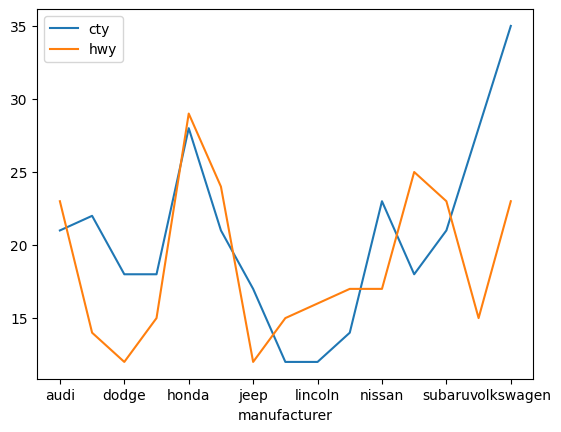

In [122]:
df.plot()

### PCA 연습 1

In [132]:
## 차원 축소 PCA 기법
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

X = iris.data
y = iris.target

# scaling 하기 (target 값을 제외하고 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [ ]:
## PCA 클래스 불러와서 변환하기
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X_scaled)
X_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [135]:
## explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공
## 앞 4개 차원의 데이터를 2개 차원으로 줄이면서 두 데이터의 변동성 비율을 기반으로 첫 번째 주 축(긴 축) 설정

pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [138]:
## 분류하고 결과 반환하기
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, X_scaled, y, scoring = 'accuracy', cv = 3)
print(f'원본 데이터 교차 검증 개별 정확도 : {scores}')
print(f'원본 데이터 평균 정확도 : {np.mean(scores)}')
      
      
pca_scores = cross_val_score(rcf, X_pca, y, scoring = 'accuracy', cv = 3)
print(f'PCA 변환 데이터 교차 검증 개별 정확도 : {pca_scores}')
print(f'PCA 변환 데이터 평균 정확도 : {np.mean(pca_scores)}')

원본 데이터 교차 검증 개별 정확도 : [0.98 0.94 0.96]
원본 데이터 평균 정확도 : 0.96
PCA 변환 데이터 교차 검증 개별 정확도 : [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도 : 0.88


## PCA 연습 2

In [140]:
pip install xlrd

     ---------------------------------------- 96.5/96.5 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [195]:
import pandas as pd

df = pd.read_excel('./data/pca_credit_card.xls', header = 1, sheet_name = 'Data').iloc[:, 1:]

print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [196]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1) 

In [197]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [198]:
###### PCA
### 6개의 속성을 2개의 컴포넌트 PCA 변환한 뒤 개별 컴포넌트의 변동성을 알아보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [199]:
df_backup = df.copy()

In [174]:
### BILL_AMT 6개만 뽑아내기
df = df.iloc[:, 11:17]

df

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980
29996,1683,1828,3502,8979,5190,0
29997,3565,3356,2758,20878,20582,19357
29998,-1645,78379,76304,52774,11855,48944


In [200]:
### 1. scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

s_X_features = scaler.fit_transform(s_X_features)

In [201]:
### 2. PCA 변환
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

X_pca = pca.fit_transform(s_X_features)
X_pca

array([[-1.61114812,  0.01247912, -0.00438352],
       [-1.54759523, -0.06234401,  0.01729838],
       [-1.03587378,  0.01125622, -0.09972617],
       ...,
       [-1.19551872, -0.3595072 , -0.01036459],
       [-0.00829343, -0.04995798,  0.57244553],
       [-0.25828552,  0.26525237,  0.18261746]])

In [202]:
### 3. LogisticRegression으로 분류 cv = 5
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

l_reg = LogisticRegression()

pca_score = cross_val_score(l_reg, X_pca, y_target, scoring = 'accuracy', cv = 5)
pca_score

array([0.77866667, 0.77883333, 0.77883333, 0.77883333, 0.77883333])

In [162]:
### 4. PCA 변환 이전의 데이터 LogisticRegression 분류 후 비교하기 cv = 5 (accuracy)

In [203]:
ori_score = cross_val_score(l_reg, s_X_features, y_target, scoring = 'accuracy', cv = 5)
ori_score

array([0.77866667, 0.77883333, 0.77883333, 0.77883333, 0.77883333])